# Lab Test - CAT 1
## **Question 4: Dijkstra’s Algorithm**

* Created By : Blessy Louis (2348416)
* Created On : 22.07.2024
* Submitted On : 22.07.2024

# **AIM**

* The Aim of this Assignment is to  find the shortest paths from node 0 to all other nodes in the given graph using the Dijkstra's Algorithm

* We further aim to visualize the graph  and the shortest path  tree obtained using Dijkstra 's Algorithm

* Using the same implementation,  we aim to find and print the shortest path from node 0 to a specified vertex , and also to visualize the same

## **Procedure**

* Step -1 : To clearly define the aim and objective of the assign
* step - 2 :  Import import libraries required for the analysis
* Step -3 :  Define a function , that takes the graph and the start node , as parameters , to implement the  Dijikstra's Algorithm
* Step -4 : Initialize the priority queue , since are priority is to select the path with shortest distances.
* step-5: Initailze the  start node distance as 0 , and all the other nodes with a distance of infinity.
* Step - 6 : Define the graph in the form of a adjacency list
* Step-7 : Travese the entire graph , and find the shortest distances , and print them.
* Step - 8 :  Plotting the graph and Visualizing the shortest path hence found
* Step - 9 :  we find the shortest path , for the said  target node
* Step -10 : Visualize the found path  

Importing Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

Sub-division i)

In [12]:
import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity and set the start node distance to 0
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0

    # Priority queue to hold nodes to explore
    priority_queue = [(0, start)]
    heapq.heapify(priority_queue)

    # To keep track of the shortest path
    shortest_path = {node: None for node in graph}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                shortest_path[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, shortest_path

# Adjacency list with weights
graph = {
    0: {1: 2, 2: 6},
    1: {0: 2, 3: 5, 4: 3},
    2: {0: 6, 3: 8},
    3: {1: 5, 2: 8, 4: 10, 5: 15},
    4: {1: 3, 3: 10, 5: 7},
    5: {3: 15, 4: 7}
}

# Calculate shortest paths from node 0
distances, shortest_path = dijkstra(graph, 0)

# Print shortest distances
for node in distances:
    print(f"Shortest distance from node 0 to node {node} is {distances[node]}")
    print("The shortest path from 0 is ",shortest_path)

Shortest distance from node 0 to node 0 is 0
The shortest path from 0 is  {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}
Shortest distance from node 0 to node 1 is 2
The shortest path from 0 is  {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}
Shortest distance from node 0 to node 2 is 6
The shortest path from 0 is  {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}
Shortest distance from node 0 to node 3 is 7
The shortest path from 0 is  {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}
Shortest distance from node 0 to node 4 is 5
The shortest path from 0 is  {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}
Shortest distance from node 0 to node 5 is 12
The shortest path from 0 is  {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}


## **Interpretation**:

Let us assume that the nodes in the above graph are different locations where a sales person has to meet his clients ,  He has to finish meeting all his clients as earlier as possible to report back to his office.Let us also consider the weightrs to be distances in kilometers.
* If we consider location 0 as the first location he has to travel
* we clearly see that the shortest distance  for the next location would be location 1 , since it has a smallest distance of 2km
* Once the sales person has visited both the clients from location 0 and location 1
* The next nearest location would be  location 4 since it has the smallest distance of 5 km
* Similarly he would move to location 2 with a distance of 6km , and henceforth to location 3 and lastly to  location 5.

By finding these shortest path , we can help the sales person to meet all his clients  in a short period of time , saving his time and energy

sub- division ii)

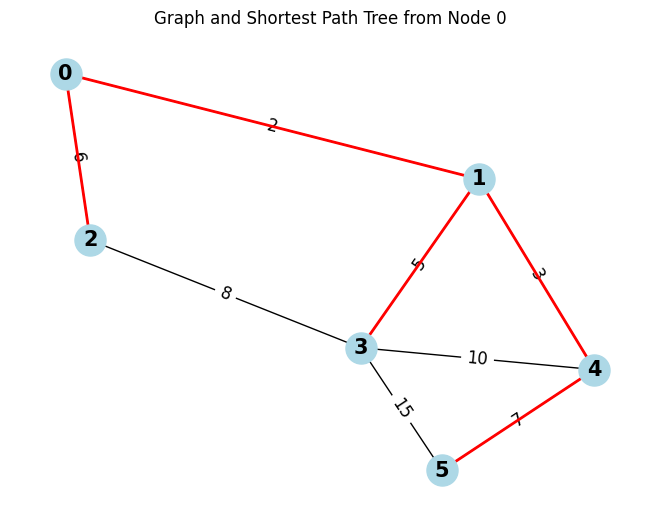

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, shortest_path, start):
    G = nx.Graph()

    # Adding edges with weights to the graph
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)

    # Draw the nodes and the edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{graph[i][j]}" for i in graph for j in graph[i]}, font_size=12)

    # Highlight the shortest path tree
    edges = []
    for node in shortest_path:
        if shortest_path[node] is not None:
            edges.append((shortest_path[node], node))
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    plt.title("Graph and Shortest Path Tree from Node 0")
    plt.show()

# Visualize the graph and shortest path tree
visualize_graph(graph, shortest_path, 0)


# **Interpretation:**

From the Above graph we observe that the  shortest path from 0  is highlighted in the red  
* That is the shortest path  for the  sales person to travel , is to start from 0  and choose  the path to 1 since it has the smallest  distance of 2, once he has met the client at location 1
*  From location 1 he can move to the loction4 , since it has a small distance of 3
* Lastly he can travel to location 5 since , it would be the last location of the day  with a distance of 7


Sub-div iii)

In [9]:
def get_shortest_path(shortest_path, start, end):
    path = []
    while end is not None:
        path.append(end)
        end = shortest_path[end]
    return path[::-1]

# Find and print the shortest path from node 0 to node 5
path_to_node_5 = get_shortest_path(shortest_path, 0, 5)
print(f"Shortest path from node 0 to node 5: {path_to_node_5}")


Shortest path from node 0 to node 5: [0, 1, 4, 5]


# **Interpretation:**

Let us assume a scenario where , the sales person has to meet a client at location 5 , using Dijkstra's algorithm we can suggest the sales person to take a path of starting from  location 0 and moving to location 1 , and hence proceding to location 4 , and lastly to location 5
* This will help the sales person to cover a few locations , while he still reaches the target location in a shorter distance , in  short period of time

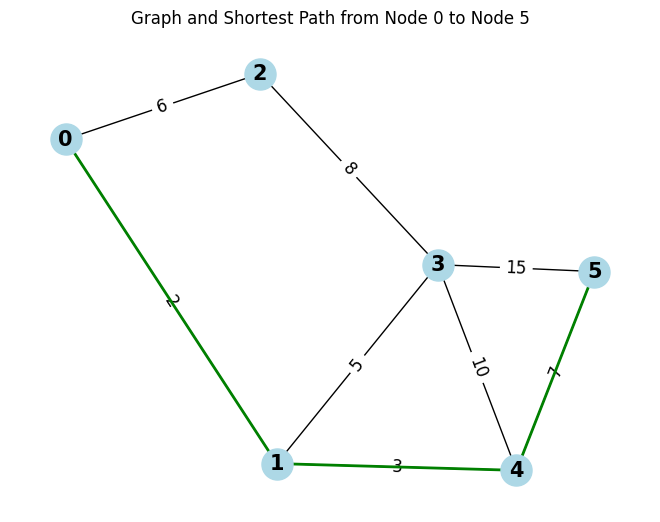

In [10]:
def visualize_specific_path(graph, path):
    G = nx.Graph()

    # Adding edges with weights to the graph
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)

    # Draw the nodes and the edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{graph[i][j]}" for i in graph for j in graph[i]}, font_size=12)

    # Highlight the specific shortest path
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='g', width=2)

    plt.title("Graph and Shortest Path from Node 0 to Node 5")
    plt.show()

# Visualize the specific shortest path from node 0 to node 5
visualize_specific_path(graph, path_to_node_5)


## **Interpretation :**

We can clearly visualize the shortest path , the sales person needs to take from  start location to the  location 5 , which is to:

* travel to location 1  from there , he has to move to location 4
which will lastly lead him to  target location5

* we can use this shortest path , for furture travels , as well , this helps the sales person to finish his work , in short period of time , saving a lot of energy
* The disadvantage would be that , he cannot cover all the   locations in the same day .